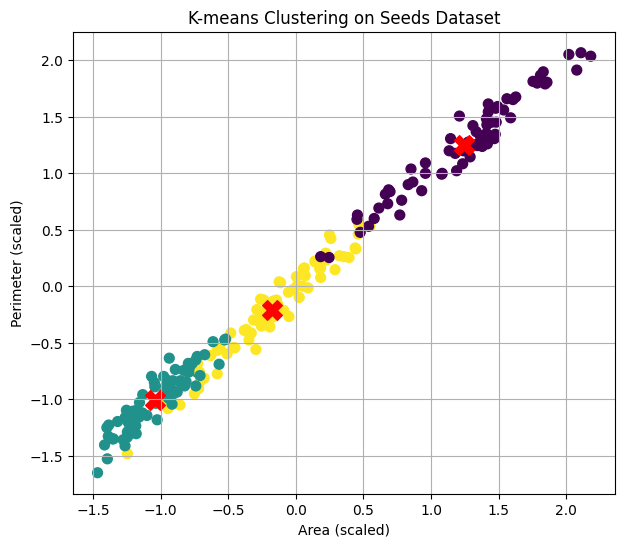

In [1]:
# ================================
# K-means clustering on the Seeds dataset
# ================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# -------------------------------
# Load Seeds dataset
# -------------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
column_names = [
    "area", "perimeter", "compactness", "length_kernel",
    "width_kernel", "asymmetry", "length_groove", "class"
]
seeds = pd.read_csv(url, sep=r"\s+", names=column_names)

# -------------------------------
# Only numeric features
# -------------------------------
X = seeds.iloc[:, :-1].values  

# -------------------------------
# Standardize features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# Fit K-means without labels
# -------------------------------
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# -------------------------------
# Visualize clusters (first two features)
# -------------------------------
plt.figure(figsize=(7,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Area (scaled)')
plt.ylabel('Perimeter (scaled)')
plt.title('K-means Clustering on Seeds Dataset')
plt.grid(True)
plt.savefig('img/seed_kMeansClustering.png')  # optional save
plt.show()
